In [71]:
import pandas as pd
import numpy as np   
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_csv('Bitcoin_Historical_Data1.csv', parse_dates=['date'])
print(df.head())

                       date   adj_close       close        high         low  \
0 2014-09-17 00:00:00+00:00  457.334015  457.334015  468.174011  452.421997   
1 2014-09-18 00:00:00+00:00  424.440002  424.440002  456.859985  413.104004   
2 2014-09-19 00:00:00+00:00  394.795990  394.795990  427.834992  384.532013   
3 2014-09-20 00:00:00+00:00  408.903992  408.903992  423.295990  389.882996   
4 2014-09-21 00:00:00+00:00  398.821014  398.821014  412.425995  393.181000   

         open      volume  daily_returns profit/loss  percentreturn  ...  \
0  465.864014  21056800.0      -1.831006        LOSS      -0.400365  ...   
1  456.859985  34483200.0      -7.096262        LOSS      -1.671912  ...   
2  424.102997  37919700.0      -6.910351        LOSS      -1.750360  ...   
3  394.673004  36863600.0       3.605767      PROFIT       0.881813  ...   
4  408.084992  26580100.0      -2.270110        LOSS      -0.569205  ...   

   rolling_return_30  rolling_max_7  rolling_min_7  close_lag_1  clo

In [73]:
# Check the data type of the 'date' column
print('data type of time:', df['date'].dtype)

# Remove any rows where 'date' column has missing values
df.dropna(subset=['date'], inplace=True)

# Print the count of missing values in each column after cleaning
print('NA Sum:\n', df.isnull().sum())

# Display first 5 entries of the 'date' column
df['date'].head()

data type of time: datetime64[ns, UTC]
NA Sum:
 date                         0
adj_close                    0
close                        0
high                         0
low                          0
open                         0
volume                       0
daily_returns                0
profit/loss                  0
percentreturn                0
MA50                        49
MA200                      199
price_range                  0
price_change                 0
volatility                   0
RSI                         13
EMA12                        0
EMA26                        0
MACD                         0
Signal_Line                  0
RSI_Signal                   0
MACD_Signal                  0
day_of_week                  0
week_of_year                 0
month                        0
is_weekend                   0
BB_middle                   19
BB_std                      19
BB_upper                    19
BB_lower                    19
BB_width              

0   2014-09-17 00:00:00+00:00
1   2014-09-18 00:00:00+00:00
2   2014-09-19 00:00:00+00:00
3   2014-09-20 00:00:00+00:00
4   2014-09-21 00:00:00+00:00
Name: date, dtype: datetime64[ns, UTC]

In [74]:
# DROP ALL COLUMNS THAT ARE NOT INTEGERS OR FLOATS
dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
coltokeep = [
    col for col in df.columns
    if col.lower() == 'date' or df[col].dtype.name in dtypes]

df1 = df[coltokeep]

In [75]:
# Display the columns that remain after filtering for numeric types
print("columns left:", df1.columns.tolist())

print(df1)
df1.head()

columns left: ['date', 'adj_close', 'close', 'high', 'low', 'open', 'volume', 'daily_returns', 'percentreturn', 'MA50', 'MA200', 'price_range', 'price_change', 'volatility', 'RSI', 'EMA12', 'EMA26', 'MACD', 'Signal_Line', 'day_of_week', 'week_of_year', 'month', 'is_weekend', 'BB_middle', 'BB_std', 'BB_upper', 'BB_lower', 'BB_width', 'stoch_k', 'stoch_d', 'ATR', 'OBV', 'vwap', 'rolling_mean_7', 'rolling_mean_30', 'rolling_vol_7', 'rolling_vol_30', 'rolling_return_7', 'rolling_return_30', 'rolling_max_7', 'rolling_min_7', 'close_lag_1', 'close_lag_3', 'close_lag_7', 'close_lag_30', 'trend_strength', 'volatility_volume_ratio', 'MACD_histogram']
                          date     adj_close         close          high  \
0    2014-09-17 00:00:00+00:00    457.334015    457.334015    468.174011   
1    2014-09-18 00:00:00+00:00    424.440002    424.440002    456.859985   
2    2014-09-19 00:00:00+00:00    394.795990    394.795990    427.834992   
3    2014-09-20 00:00:00+00:00    408.903992  

,date,adj_close,close,high,low,open,volume,daily_returns,percentreturn,MA50,...,rolling_return_30,rolling_max_7,rolling_min_7,close_lag_1,close_lag_3,close_lag_7,close_lag_30,trend_strength,volatility_volume_ratio,MACD_histogram
0,2014-09-17 00:00:00+00:00,457.334015,457.334015,468.174011,452.421997,465.864014,21056800.0,-1.831006,-0.400365,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.605775e-09,0.000000
1,2014-09-18 00:00:00+00:00,424.440002,424.440002,456.859985,413.104004,456.859985,34483200.0,-7.096262,-1.671912,NaN,...,NaN,NaN,NaN,457.334015,NaN,NaN,NaN,NaN,2.777453e-09,-0.328003
2,2014-09-19 00:00:00+00:00,394.795990,394.795990,427.834992,384.532013,424.102997,37919700.0,-6.910351,-1.750360,NaN,...,NaN,NaN,NaN,424.440002,NaN,NaN,NaN,NaN,2.692660e-09,-0.855515
3,2014-09-20 00:00:00+00:00,408.903992,408.903992,423.295990,389.882996,394.673004,36863600.0,3.605767,0.881813,NaN,...,NaN,NaN,NaN,394.795990,457.334015,NaN,NaN,NaN,2.296573e-09,-0.536080
4,2014-09-21 00:00:00+00:00,398.821014,398.821014,412.425995,393.181000,408.084992,26580100.0,-2.270110,-0.569205,NaN,...,NaN,NaN,NaN,408.903992,424.440002,NaN,NaN,NaN,1.774233e-09,-0.614533


In [76]:
# Get columns with NaN values and their count
nan_columns = df1.columns[df1.isna().any()].tolist()
nan_counts = df1[nan_columns].isna().sum()

print("columns with Nan entries:\n", nan_columns)

print("total number of Nan values:\n", nan_counts)


columns with Nan entries:
 ['MA50', 'MA200', 'RSI', 'BB_middle', 'BB_std', 'BB_upper', 'BB_lower', 'BB_width', 'stoch_k', 'stoch_d', 'ATR', 'rolling_mean_7', 'rolling_mean_30', 'rolling_vol_7', 'rolling_vol_30', 'rolling_return_7', 'rolling_return_30', 'rolling_max_7', 'rolling_min_7', 'close_lag_1', 'close_lag_3', 'close_lag_7', 'close_lag_30', 'trend_strength']
total number of Nan values:
 MA50                  49
MA200                199
RSI                   13
BB_middle             19
BB_std                19
BB_upper              19
BB_lower              19
BB_width              19
stoch_k               13
stoch_d               15
ATR                   13
rolling_mean_7         6
rolling_mean_30       29
rolling_vol_7          6
rolling_vol_30        29
rolling_return_7       7
rolling_return_30     30
rolling_max_7          6
rolling_min_7          6
close_lag_1            1
close_lag_3            3
close_lag_7            7
close_lag_30          30
trend_strength       199
dtype

In [77]:

# 2. Reset index if needed and ensure proper datetime format
# df1 = df1.reset_index()
df1['date'] = pd.to_datetime(df1['date'])  # Assuming your date column is named 'Date'
df1 = df1.set_index('date')


/var/folders/vx/290sh8j95bvg24gn1z88w0s80000gn/T/ipykernel_8069/933956066.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date'] = pd.to_datetime(df1['date'])  # Assuming your date column is named 'Date'


In [78]:
print(df1.head())

                            adj_close       close        high         low  \
date                                                                        
2014-09-17 00:00:00+00:00  457.334015  457.334015  468.174011  452.421997   
2014-09-18 00:00:00+00:00  424.440002  424.440002  456.859985  413.104004   
2014-09-19 00:00:00+00:00  394.795990  394.795990  427.834992  384.532013   
2014-09-20 00:00:00+00:00  408.903992  408.903992  423.295990  389.882996   
2014-09-21 00:00:00+00:00  398.821014  398.821014  412.425995  393.181000   

                                 open      volume  daily_returns  \
date                                                               
2014-09-17 00:00:00+00:00  465.864014  21056800.0      -1.831006   
2014-09-18 00:00:00+00:00  456.859985  34483200.0      -7.096262   
2014-09-19 00:00:00+00:00  424.102997  37919700.0      -6.910351   
2014-09-20 00:00:00+00:00  394.673004  36863600.0       3.605767   
2014-09-21 00:00:00+00:00  408.084992  26580100.0   

In [79]:
df1.columns

Index(['adj_close', 'close', 'high', 'low', 'open', 'volume', 'daily_returns',
       'percentreturn', 'MA50', 'MA200', 'price_range', 'price_change',
       'volatility', 'RSI', 'EMA12', 'EMA26', 'MACD', 'Signal_Line',
       'day_of_week', 'week_of_year', 'month', 'is_weekend', 'BB_middle',
       'BB_std', 'BB_upper', 'BB_lower', 'BB_width', 'stoch_k', 'stoch_d',
       'ATR', 'OBV', 'vwap', 'rolling_mean_7', 'rolling_mean_30',
       'rolling_vol_7', 'rolling_vol_30', 'rolling_return_7',
       'rolling_return_30', 'rolling_max_7', 'rolling_min_7', 'close_lag_1',
       'close_lag_3', 'close_lag_7', 'close_lag_30', 'trend_strength',
       'volatility_volume_ratio', 'MACD_histogram'],
      dtype='object')

In [80]:
clean_df = df1.interpolate(method='linear')

In [81]:
# 5. Verify results
print("\nMissing values after interpolation:")
print(clean_df.isnull().sum())
print("\nBasic statistics of cleaned data:")
print(clean_df.describe())


Missing values after interpolation:
adj_close                    0
close                        0
high                         0
low                          0
open                         0
volume                       0
daily_returns                0
percentreturn                0
MA50                        49
MA200                      199
price_range                  0
price_change                 0
volatility                   0
RSI                         13
EMA12                        0
EMA26                        0
MACD                         0
Signal_Line                  0
day_of_week                  0
week_of_year                 0
month                        0
is_weekend                   0
BB_middle                   19
BB_std                      19
BB_upper                    19
BB_lower                    19
BB_width                    19
stoch_k                     13
stoch_d                     15
ATR                         13
OBV                          0
vw

In [82]:
df1.head()

,adj_close,close,high,low,open,volume,daily_returns,percentreturn,MA50,MA200,...,rolling_return_30,rolling_max_7,rolling_min_7,close_lag_1,close_lag_3,close_lag_7,close_lag_30,trend_strength,volatility_volume_ratio,MACD_histogram
date,,,,,,,,,,,,,,,,,,,,,
2014-09-17 00:00:00+00:00,457.334015,457.334015,468.174011,452.421997,465.864014,21056800.0,-1.831006,-0.400365,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.605775e-09,0.000000
2014-09-18 00:00:00+00:00,424.440002,424.440002,456.859985,413.104004,456.859985,34483200.0,-7.096262,-1.671912,NaN,NaN,...,NaN,NaN,NaN,457.334015,NaN,NaN,NaN,NaN,2.777453e-09,-0.328003
2014-09-19 00:00:00+00:00,394.795990,394.795990,427.834992,384.532013,424.102997,37919700.0,-6.910351,-1.750360,NaN,NaN,...,NaN,NaN,NaN,424.440002,NaN,NaN,NaN,NaN,2.692660e-09,-0.855515
2014-09-20 00:00:00+00:00,408.903992,408.903992,423.295990,389.882996,394.673004,36863600.0,3.605767,0.881813,NaN,NaN,...,NaN,NaN,NaN,394.795990,457.334015,NaN,NaN,NaN,2.296573e-09,-0.536080
2014-09-21 00:00:00+00:00,398.821014,398.821014,412.425995,393.181000,408.084992,26580100.0,-2.270110,-0.569205,NaN,NaN,...,NaN,NaN,NaN,408.903992,424.440002,NaN,NaN,NaN,1.774233e-09,-0.614533


In [83]:
# Impute missing values using forward fill then backward fill
clean_df = df1.interpolate(method='spline', order=3)

In [84]:
clean_df.head()

,adj_close,close,high,low,open,volume,daily_returns,percentreturn,MA50,MA200,...,rolling_return_30,rolling_max_7,rolling_min_7,close_lag_1,close_lag_3,close_lag_7,close_lag_30,trend_strength,volatility_volume_ratio,MACD_histogram
date,,,,,,,,,,,,,,,,,,,,,
2014-09-17 00:00:00+00:00,457.334015,457.334015,468.174011,452.421997,465.864014,21056800.0,-1.831006,-0.400365,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.605775e-09,0.000000
2014-09-18 00:00:00+00:00,424.440002,424.440002,456.859985,413.104004,456.859985,34483200.0,-7.096262,-1.671912,NaN,NaN,...,NaN,NaN,NaN,457.334015,NaN,NaN,NaN,NaN,2.777453e-09,-0.328003
2014-09-19 00:00:00+00:00,394.795990,394.795990,427.834992,384.532013,424.102997,37919700.0,-6.910351,-1.750360,NaN,NaN,...,NaN,NaN,NaN,424.440002,NaN,NaN,NaN,NaN,2.692660e-09,-0.855515
2014-09-20 00:00:00+00:00,408.903992,408.903992,423.295990,389.882996,394.673004,36863600.0,3.605767,0.881813,NaN,NaN,...,NaN,NaN,NaN,394.795990,457.334015,NaN,NaN,NaN,2.296573e-09,-0.536080
2014-09-21 00:00:00+00:00,398.821014,398.821014,412.425995,393.181000,408.084992,26580100.0,-2.270110,-0.569205,NaN,NaN,...,NaN,NaN,NaN,408.903992,424.440002,NaN,NaN,NaN,1.774233e-09,-0.614533


In [86]:
def handle_technical_indicators(df):
    # Make a copy to avoid modifying original data
    df = df.copy()
    
    # 1. Trend Indicators - Linear interpolation then ffill/bfill
    trend_indicators = ['MA50', 'MA200', 'BB_middle', 'trend_strength', 
                       'rolling_mean_7', 'rolling_mean_30']
    df[trend_indicators] = df[trend_indicators].interpolate(method='linear').ffill().bfill()
    
    # 2. Volatility Indicators - More robust handling
    volatility_indicators = ['BB_std', 'BB_upper', 'BB_lower', 'BB_width', 
                           'ATR', 'rolling_vol_7', 'rolling_vol_30']
    df[volatility_indicators] = df[volatility_indicators].interpolate(method='linear').ffill().bfill()
    
    # 3. Momentum Indicators - Handle within valid ranges
    momentum_indicators = ['RSI', 'stoch_k', 'stoch_d']
    for col in momentum_indicators:
        df[col] = df[col].interpolate(method='linear').ffill().bfill().clip(0, 100)
    
    # 4. Price Return Indicators - Handle with zero for missing values
    return_indicators = ['rolling_return_7', 'rolling_return_30']
    df[return_indicators] = df[return_indicators].interpolate(method='linear').fillna(0)
    
    # 5. Price Range Indicators - Forward and backward fill
    range_indicators = ['rolling_max_7', 'rolling_min_7']
    df[range_indicators] = df[range_indicators].ffill().bfill()
    
    # 6. Lagged Price Indicators - More robust handling
    lag_indicators = ['close_lag_1', 'close_lag_3', 'close_lag_7', 'close_lag_30']
    df[lag_indicators] = df[lag_indicators].ffill().bfill()
    
    # Final check and cleanup
    remaining_nulls = df[nan_columns].isnull().sum()
    if remaining_nulls.any():
        print("Filling remaining nulls with appropriate methods")
        df = df.fillna(method='ffill').fillna(method='bfill')
    
    return df

# Apply the enhanced handling
clean_df = handle_technical_indicators(clean_df)

# Verify results
print("Remaining null values:")
print(clean_df[nan_columns].isnull().sum())

# Additional verification
print("\nShape of dataframe:", clean_df.shape)
print("\nSample of cleaned data:")
print(clean_df[nan_columns].head())

Remaining null values:
MA50                 0
MA200                0
RSI                  0
BB_middle            0
BB_std               0
BB_upper             0
BB_lower             0
BB_width             0
stoch_k              0
stoch_d              0
ATR                  0
rolling_mean_7       0
rolling_mean_30      0
rolling_vol_7        0
rolling_vol_30       0
rolling_return_7     0
rolling_return_30    0
rolling_max_7        0
rolling_min_7        0
close_lag_1          0
close_lag_3          0
close_lag_7          0
close_lag_30         0
trend_strength       0
dtype: int64

Shape of dataframe: (3724, 47)

Sample of cleaned data:
                                MA50      MA200        RSI   BB_middle  \
date                                                                     
2014-09-17 00:00:00+00:00  372.76684  310.84317  31.997433  389.910399   
2014-09-18 00:00:00+00:00  372.76684  310.84317  31.997433  389.910399   
2014-09-19 00:00:00+00:00  372.76684  310.84317  31.997433 

In [87]:
# Get columns with NaN values and their count
nan_columns = clean_df.columns[df1.isna().any()].tolist()
nan_counts = clean_df[nan_columns].isna().sum()

print("columns with Nan entries:\n", nan_columns)

print("total number of Nan values:\n", nan_counts)


columns with Nan entries:
 ['MA50', 'MA200', 'RSI', 'BB_middle', 'BB_std', 'BB_upper', 'BB_lower', 'BB_width', 'stoch_k', 'stoch_d', 'ATR', 'rolling_mean_7', 'rolling_mean_30', 'rolling_vol_7', 'rolling_vol_30', 'rolling_return_7', 'rolling_return_30', 'rolling_max_7', 'rolling_min_7', 'close_lag_1', 'close_lag_3', 'close_lag_7', 'close_lag_30', 'trend_strength']
total number of Nan values:
 MA50                 0
MA200                0
RSI                  0
BB_middle            0
BB_std               0
BB_upper             0
BB_lower             0
BB_width             0
stoch_k              0
stoch_d              0
ATR                  0
rolling_mean_7       0
rolling_mean_30      0
rolling_vol_7        0
rolling_vol_30       0
rolling_return_7     0
rolling_return_30    0
rolling_max_7        0
rolling_min_7        0
close_lag_1          0
close_lag_3          0
close_lag_7          0
close_lag_30         0
trend_strength       0
dtype: int64


In [69]:
print(clean_df.isnull().sum())

adj_close                  0
close                      0
high                       0
low                        0
open                       0
volume                     0
daily_returns              0
percentreturn              0
MA50                       0
MA200                      0
price_range                0
price_change               0
volatility                 0
RSI                        0
EMA12                      0
EMA26                      0
MACD                       0
Signal_Line                0
day_of_week                0
week_of_year               0
month                      0
is_weekend                 0
BB_middle                  0
BB_std                     0
BB_upper                   0
BB_lower                   0
BB_width                   0
stoch_k                    0
stoch_d                    0
ATR                        0
OBV                        0
vwap                       0
rolling_mean_7             0
rolling_mean_30            0
rolling_vol_7 

In [88]:
clean_df.columns

Index(['adj_close', 'close', 'high', 'low', 'open', 'volume', 'daily_returns',
       'percentreturn', 'MA50', 'MA200', 'price_range', 'price_change',
       'volatility', 'RSI', 'EMA12', 'EMA26', 'MACD', 'Signal_Line',
       'day_of_week', 'week_of_year', 'month', 'is_weekend', 'BB_middle',
       'BB_std', 'BB_upper', 'BB_lower', 'BB_width', 'stoch_k', 'stoch_d',
       'ATR', 'OBV', 'vwap', 'rolling_mean_7', 'rolling_mean_30',
       'rolling_vol_7', 'rolling_vol_30', 'rolling_return_7',
       'rolling_return_30', 'rolling_max_7', 'rolling_min_7', 'close_lag_1',
       'close_lag_3', 'close_lag_7', 'close_lag_30', 'trend_strength',
       'volatility_volume_ratio', 'MACD_histogram'],
      dtype='object')

In [89]:
clean_df.head()

,adj_close,close,high,low,open,volume,daily_returns,percentreturn,MA50,MA200,...,rolling_return_30,rolling_max_7,rolling_min_7,close_lag_1,close_lag_3,close_lag_7,close_lag_30,trend_strength,volatility_volume_ratio,MACD_histogram
date,,,,,,,,,,,,,,,,,,,,,
2014-09-17 00:00:00+00:00,457.334015,457.334015,468.174011,452.421997,465.864014,21056800.0,-1.831006,-0.400365,372.76684,310.84317,...,0.0,468.174011,384.532013,457.334015,457.334015,457.334015,457.334015,0.835065,1.605775e-09,0.000000
2014-09-18 00:00:00+00:00,424.440002,424.440002,456.859985,413.104004,456.859985,34483200.0,-7.096262,-1.671912,372.76684,310.84317,...,0.0,468.174011,384.532013,457.334015,457.334015,457.334015,457.334015,0.835065,2.777453e-09,-0.328003
2014-09-19 00:00:00+00:00,394.795990,394.795990,427.834992,384.532013,424.102997,37919700.0,-6.910351,-1.750360,372.76684,310.84317,...,0.0,468.174011,384.532013,424.440002,457.334015,457.334015,457.334015,0.835065,2.692660e-09,-0.855515
2014-09-20 00:00:00+00:00,408.903992,408.903992,423.295990,389.882996,394.673004,36863600.0,3.605767,0.881813,372.76684,310.84317,...,0.0,468.174011,384.532013,394.795990,457.334015,457.334015,457.334015,0.835065,2.296573e-09,-0.536080
2014-09-21 00:00:00+00:00,398.821014,398.821014,412.425995,393.181000,408.084992,26580100.0,-2.270110,-0.569205,372.76684,310.84317,...,0.0,468.174011,384.532013,408.903992,424.440002,457.334015,457.334015,0.835065,1.774233e-09,-0.614533


In [90]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3724 entries, 2014-09-17 00:00:00+00:00 to 2024-11-26 00:00:00+00:00
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   adj_close                3724 non-null   float64
 1   close                    3724 non-null   float64
 2   high                     3724 non-null   float64
 3   low                      3724 non-null   float64
 4   open                     3724 non-null   float64
 5   volume                   3724 non-null   float64
 6   daily_returns            3724 non-null   float64
 7   percentreturn            3724 non-null   float64
 8   MA50                     3724 non-null   float64
 9   MA200                    3724 non-null   float64
 10  price_range              3724 non-null   float64
 11  price_change             3724 non-null   float64
 12  volatility               3724 non-null   float64
 13  RSI                      3724 

In [91]:
clean_df.describe()

,adj_close,close,high,low,open,volume,daily_returns,percentreturn,MA50,MA200,...,rolling_return_30,rolling_max_7,rolling_min_7,close_lag_1,close_lag_3,close_lag_7,close_lag_30,trend_strength,volatility_volume_ratio,MACD_histogram
count,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3.724000e+03,3724.000000,3724.000000,3724.000000,3724.000000,...,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3.724000e+03,3724.000000
mean,18848.682607,18848.682607,19251.921860,18381.434184,18825.293605,1.814889e+10,0.201795,0.004997,18306.028955,17028.069552,...,0.068654,19957.159926,17464.371188,18824.104737,18773.030234,18668.897627,18181.910691,1.110848,2.157967e-10,6.801811
std,20873.547415,20873.547415,21309.793415,20365.354458,20843.083528,1.975932e+10,3.620708,0.509438,20068.552006,18502.336652,...,0.238982,21982.991335,19361.809895,20841.268998,20769.467226,20617.317932,20091.492308,0.288303,5.583792e-10,303.477724
min,178.102997,178.102997,211.731003,171.509995,176.897003,5.914570e+06,-37.186895,-11.483293,232.261620,245.701330,...,-0.603168,229.067001,171.509995,178.102997,178.102997,178.102997,178.102997,0.627390,1.859263e-13,-1694.518207
25%,1198.755005,1198.755005,1217.054962,1178.120025,1192.667511,3.519457e+08,-1.262873,-0.011670,1121.405890,869.252090,...,-0.081021,1257.979980,1124.589966,1192.555023,1187.855011,1182.002533,1095.297485,0.869851,1.235553e-12,-56.580909
50%,9284.764160,9284.764160,9440.763184,9134.778809,9284.070801,1.442858e+10,0.119255,0.000730,9217.402622,8744.339226,...,0.032624,9835.382324,8727.089844,9280.158692,9277.233887,9268.161621,9181.797363,1.080453,2.276726e-12,0.618693
75%,30182.014653,30182.014653,30605.878423,29580.905762,30153.408690,2.919828e+10,1.682767,0.019952,29086.064912,28554.177693,...,0.182366,31460.052730,28724.140630,30152.225097,30118.761720,30041.607425,29541.162113,1.264781,7.730899e-11,65.248094
max,98997.664060,98997.664060,99655.500000,97232.890630,99006.742190,3.510000e+11,25.470168,8.875621,76260.972422,66206.333692,...,1.926924,99655.500000,90770.812500,98997.664060,98997.664060,92343.789060,73083.500000,2.086303,6.642039e-09,1882.855550


In [92]:
# Define target variables for next day prediction
clean_df['next_day_price'] = clean_df['close'].shift(-1)
clean_df['next_day_return'] = (clean_df['next_day_price'] - clean_df['close']) / clean_df['close']

# Remove the last row since it will have NaN for target
clean_df = clean_df.dropna(subset=['next_day_price'])
clean_df = clean_df.dropna(subset=['next_day_return'])



In [93]:
clean_df.columns

Index(['adj_close', 'close', 'high', 'low', 'open', 'volume', 'daily_returns',
       'percentreturn', 'MA50', 'MA200', 'price_range', 'price_change',
       'volatility', 'RSI', 'EMA12', 'EMA26', 'MACD', 'Signal_Line',
       'day_of_week', 'week_of_year', 'month', 'is_weekend', 'BB_middle',
       'BB_std', 'BB_upper', 'BB_lower', 'BB_width', 'stoch_k', 'stoch_d',
       'ATR', 'OBV', 'vwap', 'rolling_mean_7', 'rolling_mean_30',
       'rolling_vol_7', 'rolling_vol_30', 'rolling_return_7',
       'rolling_return_30', 'rolling_max_7', 'rolling_min_7', 'close_lag_1',
       'close_lag_3', 'close_lag_7', 'close_lag_30', 'trend_strength',
       'volatility_volume_ratio', 'MACD_histogram', 'next_day_price',
       'next_day_return'],
      dtype='object')

In [94]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Add return-specific features
def create_return_features(df):
    df_features = df.copy()
    
    # Momentum features
    for window in [3, 5, 10, 21]:
        df_features[f'return_ma_{window}'] = df_features['next_day_return'].rolling(window=window).mean()
        df_features[f'return_std_{window}'] = df_features['next_day_return'].rolling(window=window).std()
        
    # Volatility features
    df_features['volatility'] = df_features['next_day_return'].rolling(window=21).std()
    
    # Return direction features
    df_features['pos_returns'] = (df_features['next_day_return'] > 0).astype(int)
    df_features['neg_returns'] = (df_features['next_day_return'] < 0).astype(int)
    
    return df_features



In [95]:
# . Enhance the model with better parameters
rf_returns_enhanced = RandomForestRegressor(
    n_estimators=200,
    max_depth=5,
    min_samples_leaf=4,
    min_samples_split=10,
    random_state=42
)

In [96]:
# 3. Create and prepare enhanced features
X_enhanced = create_return_features(clean_df)
X_enhanced = X_enhanced.fillna(method='ffill').fillna(0)

/var/folders/vx/290sh8j95bvg24gn1z88w0s80000gn/T/ipykernel_8069/3651267418.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_enhanced = X_enhanced.fillna(method='ffill').fillna(0)


In [97]:
X_enhanced.columns

Index(['adj_close', 'close', 'high', 'low', 'open', 'volume', 'daily_returns',
       'percentreturn', 'MA50', 'MA200', 'price_range', 'price_change',
       'volatility', 'RSI', 'EMA12', 'EMA26', 'MACD', 'Signal_Line',
       'day_of_week', 'week_of_year', 'month', 'is_weekend', 'BB_middle',
       'BB_std', 'BB_upper', 'BB_lower', 'BB_width', 'stoch_k', 'stoch_d',
       'ATR', 'OBV', 'vwap', 'rolling_mean_7', 'rolling_mean_30',
       'rolling_vol_7', 'rolling_vol_30', 'rolling_return_7',
       'rolling_return_30', 'rolling_max_7', 'rolling_min_7', 'close_lag_1',
       'close_lag_3', 'close_lag_7', 'close_lag_30', 'trend_strength',
       'volatility_volume_ratio', 'MACD_histogram', 'next_day_price',
       'next_day_return', 'return_ma_3', 'return_std_3', 'return_ma_5',
       'return_std_5', 'return_ma_10', 'return_std_10', 'return_ma_21',
       'return_std_21', 'pos_returns', 'neg_returns'],
      dtype='object')

In [98]:
X_enhanced.to_csv('Bitcoin_Historical_Data2.csv', index=False)

In [100]:
# 4. Define features (X) and target (y)

# Define features (X) and multiple targets (y1, y2)

X_enhanced = X_enhanced.drop(columns=['close', 'adj_close', 'next_day_return', 'next_day_price'])
y_returns = clean_df['next_day_return']
y_price = clean_df['next_day_price']

print("Features shape:", X_enhanced.shape)
print("Returns target shape:", y_returns.shape)
print("Price target shape:", y_price.shape)
print("\nCorrelation between targets:", np.corrcoef(y_returns, y_price)[0,1])
print("\nColumns Features:", X_enhanced.columns)
print("\nColumns Target Returns:", y_returns.head())
print("\nColumns Target Price:", y_price.head())

Features shape: (3723, 55)
Returns target shape: (3723,)
Price target shape: (3723,)

Correlation between targets: 0.009933249638790482

Columns Features: Index(['high', 'low', 'open', 'volume', 'daily_returns', 'percentreturn',
       'MA50', 'MA200', 'price_range', 'price_change', 'volatility', 'RSI',
       'EMA12', 'EMA26', 'MACD', 'Signal_Line', 'day_of_week', 'week_of_year',
       'month', 'is_weekend', 'BB_middle', 'BB_std', 'BB_upper', 'BB_lower',
       'BB_width', 'stoch_k', 'stoch_d', 'ATR', 'OBV', 'vwap',
       'rolling_mean_7', 'rolling_mean_30', 'rolling_vol_7', 'rolling_vol_30',
       'rolling_return_7', 'rolling_return_30', 'rolling_max_7',
       'rolling_min_7', 'close_lag_1', 'close_lag_3', 'close_lag_7',
       'close_lag_30', 'trend_strength', 'volatility_volume_ratio',
       'MACD_histogram', 'return_ma_3', 'return_std_3', 'return_ma_5',
       'return_std_5', 'return_ma_10', 'return_std_10', 'return_ma_21',
       'return_std_21', 'pos_returns', 'neg_returns'

In [101]:
# 4. Scale features using RobustScaler (better for financial data)
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_enhanced)
X_scaled = pd.DataFrame(X_scaled, columns=X_enhanced.columns, index=X_enhanced.index)

In [102]:
# 5. Split data using the same time-based approach
split_date = X_scaled.index[int(len(X_scaled) * 0.8)]
X_train_enhanced = X_scaled[X_scaled.index <= split_date]
X_test_enhanced = X_scaled[X_scaled.index > split_date]
y_train_returns = y_returns[y_returns.index <= split_date]
y_test_returns = y_returns[y_returns.index > split_date]

In [103]:
# 6. Train and evaluate enhanced model
rf_returns_enhanced.fit(X_train_enhanced, y_train_returns)
y_pred_enhanced = rf_returns_enhanced.predict(X_test_enhanced)

In [104]:
# define model evaluation function
def evaluate_model(y_true, y_pred, model_name):
    metrics = {
        'R2': r2_score(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAPE': mean_absolute_percentage_error(y_true, y_pred)
    }
    print(f"\n{model_name} Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    return metrics


In [106]:
# 7. Evaluate enhanced model
print("Enhanced Random Forest Returns Metrics:")
evaluate_model(y_test_returns, y_pred_enhanced, 'Enhanced RF Returns')

Enhanced Random Forest Returns Metrics:

Enhanced RF Returns Metrics:
R2: 0.7497
RMSE: 0.0126
MAPE: 8.4054


{'R2': 0.749663330646977,
 'RMSE': 0.012596420975567353,
 'MAPE': 8.405367294303108}

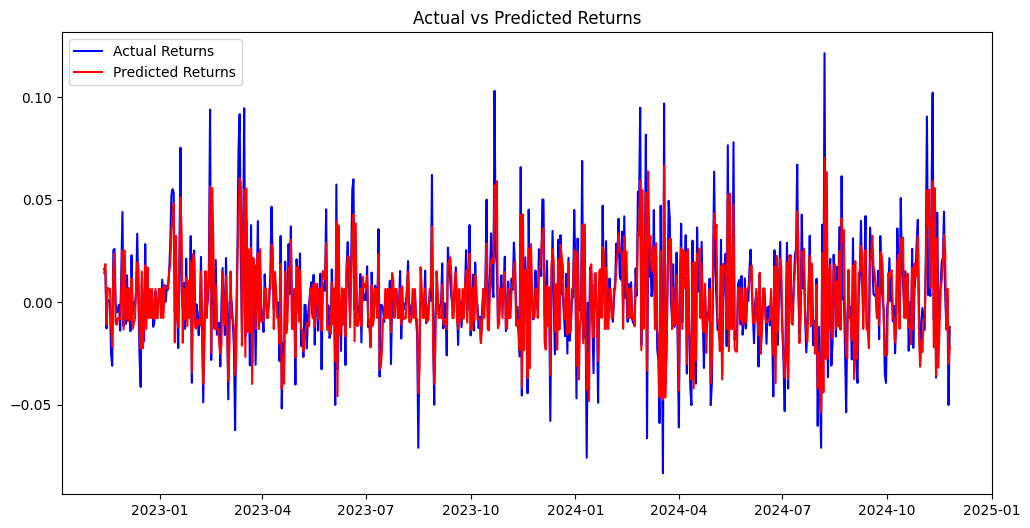

In [107]:
# 8. Plot actual vs predicted returns
plt.figure(figsize=(12, 6))
plt.plot(y_test_returns.index, y_test_returns, label='Actual Returns', color='blue')
plt.plot(y_test_returns.index, y_pred_enhanced, label='Predicted Returns', color='red')
plt.title('Actual vs Predicted Returns')
plt.legend()
plt.show()

# END

### GRADIENT BOOST FOR "PRICE" TARGET VARIABLE

In [108]:
# First, check for non-numeric columns
print("Data types in X:")
print(X_enhanced.dtypes)
print("\nNon-numeric columns:")
print(X_enhanced.select_dtypes(exclude=['float64', 'float32', 'int64', 'int32', 'int16']).columns)

Data types in X:
high                       float64
low                        float64
open                       float64
volume                     float64
daily_returns              float64
percentreturn              float64
MA50                       float64
MA200                      float64
price_range                float64
price_change               float64
volatility                 float64
RSI                        float64
EMA12                      float64
EMA26                      float64
MACD                       float64
Signal_Line                float64
day_of_week                  int64
week_of_year                 int64
month                        int64
is_weekend                   int64
BB_middle                  float64
BB_std                     float64
BB_upper                   float64
BB_lower                   float64
BB_width                   float64
stoch_k                    float64
stoch_d                    float64
ATR                        float64
OBV

In [109]:
# Select only numeric columns and handle any missing values
numeric_columns = X_enhanced.select_dtypes(include=['float64', 'float32', 'int64', 'int32', 'int16']).columns
X_numeric = X_enhanced[numeric_columns].copy()
X_numeric = X_numeric.fillna(method='ffill').fillna(method='bfill')
X_numeric.columns

/var/folders/vx/290sh8j95bvg24gn1z88w0s80000gn/T/ipykernel_8069/2323886748.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_numeric = X_numeric.fillna(method='ffill').fillna(method='bfill')


Index(['high', 'low', 'open', 'volume', 'daily_returns', 'percentreturn',
       'MA50', 'MA200', 'price_range', 'price_change', 'volatility', 'RSI',
       'EMA12', 'EMA26', 'MACD', 'Signal_Line', 'day_of_week', 'week_of_year',
       'month', 'is_weekend', 'BB_middle', 'BB_std', 'BB_upper', 'BB_lower',
       'BB_width', 'stoch_k', 'stoch_d', 'ATR', 'OBV', 'vwap',
       'rolling_mean_7', 'rolling_mean_30', 'rolling_vol_7', 'rolling_vol_30',
       'rolling_return_7', 'rolling_return_30', 'rolling_max_7',
       'rolling_min_7', 'close_lag_1', 'close_lag_3', 'close_lag_7',
       'close_lag_30', 'trend_strength', 'volatility_volume_ratio',
       'MACD_histogram', 'return_ma_3', 'return_std_3', 'return_ma_5',
       'return_std_5', 'return_ma_10', 'return_std_10', 'return_ma_21',
       'return_std_21', 'pos_returns', 'neg_returns'],
      dtype='object')

In [110]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Now scale the numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)
X_scaled = pd.DataFrame(X_scaled, columns=X_numeric.columns, index=X_numeric.index)


In [111]:
# Create time-based split (using last 20% of dates for testing)
split_date = X_scaled.index[int(len(X_scaled) * 0.8)]
print(f"Split date: {split_date}")


Split date: 2022-11-12 00:00:00+00:00


In [112]:
# Split features and targets based on date
X_train = X_scaled[X_scaled.index <= split_date]
X_test = X_scaled[X_scaled.index > split_date]
y_returns_train = y_returns[y_returns.index <= split_date]
y_returns_test = y_returns[y_returns.index > split_date]
y_price_train = y_price[y_price.index <= split_date]
y_price_test = y_price[y_price.index > split_date]

# Print split information
print("\nTraining Period:", X_train.index[0], "to", X_train.index[-1])
print("Testing Period:", X_test.index[0], "to", X_test.index[-1])
print("\nTraining set size:", len(X_train))
print("Testing set size:", len(X_test))


 #Verify no missing values and shapes
print("\nShapes:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_returns_train: {y_returns_train.shape}")
print(f"y_returns_test: {y_returns_test.shape}")
print(f"y_price_train: {y_price_train.shape}")
print(f"y_price_test: {y_price_test.shape}")



Training Period: 2014-09-17 00:00:00+00:00 to 2022-11-12 00:00:00+00:00
Testing Period: 2022-11-13 00:00:00+00:00 to 2024-11-25 00:00:00+00:00

Training set size: 2979
Testing set size: 744

Shapes:
X_train: (2979, 55)
X_test: (744, 55)
y_returns_train: (2979,)
y_returns_test: (744,)
y_price_train: (2979,)
y_price_test: (744,)


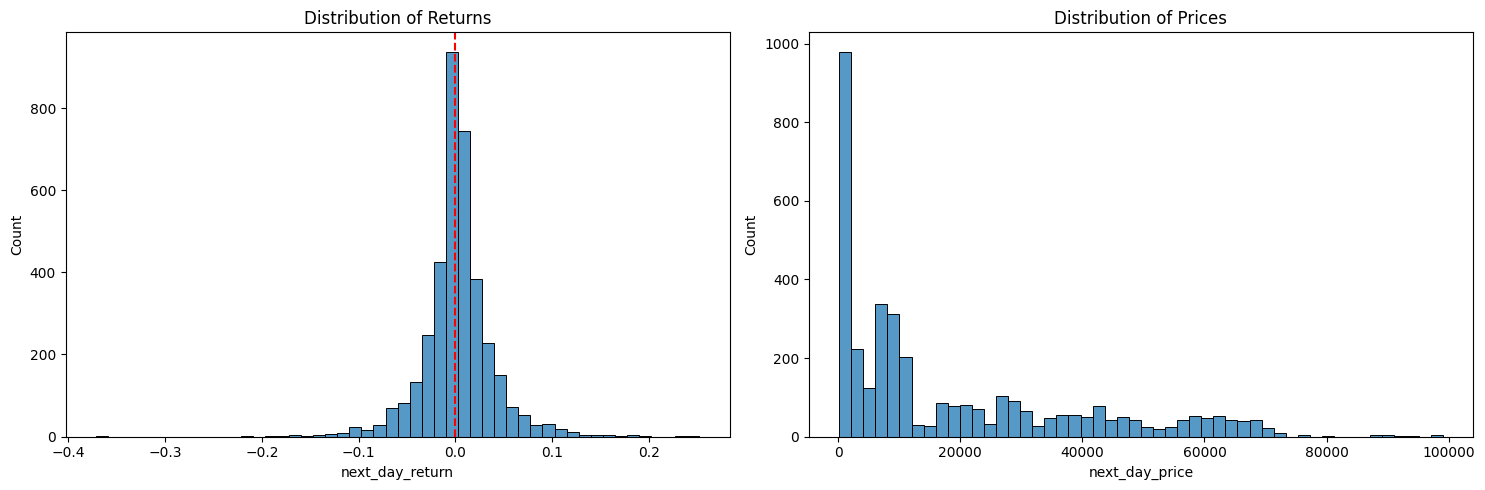


Target Statistics:

Returns:
Mean: 0.0021
Std Dev: 0.0363
Skewness: -0.1144

Prices:
Mean: 18853.62
Std Dev: 20874.17
Skewness: 1.1397


In [113]:
# Visualize distributions
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

# Returns distribution
plt.subplot(1, 2, 1)
sns.histplot(y_returns, bins=50)
plt.title('Distribution of Returns')
plt.axvline(x=0, color='r', linestyle='--')

# Price distribution
plt.subplot(1, 2, 2)
sns.histplot(y_price, bins=50)
plt.title('Distribution of Prices')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nTarget Statistics:")
print("\nReturns:")
print(f"Mean: {y_returns.mean():.4f}")
print(f"Std Dev: {y_returns.std():.4f}")
print(f"Skewness: {y_returns.skew():.4f}")
print("\nPrices:")
print(f"Mean: {y_price.mean():.2f}")
print(f"Std Dev: {y_price.std():.2f}")
print(f"Skewness: {y_price.skew():.4f}")

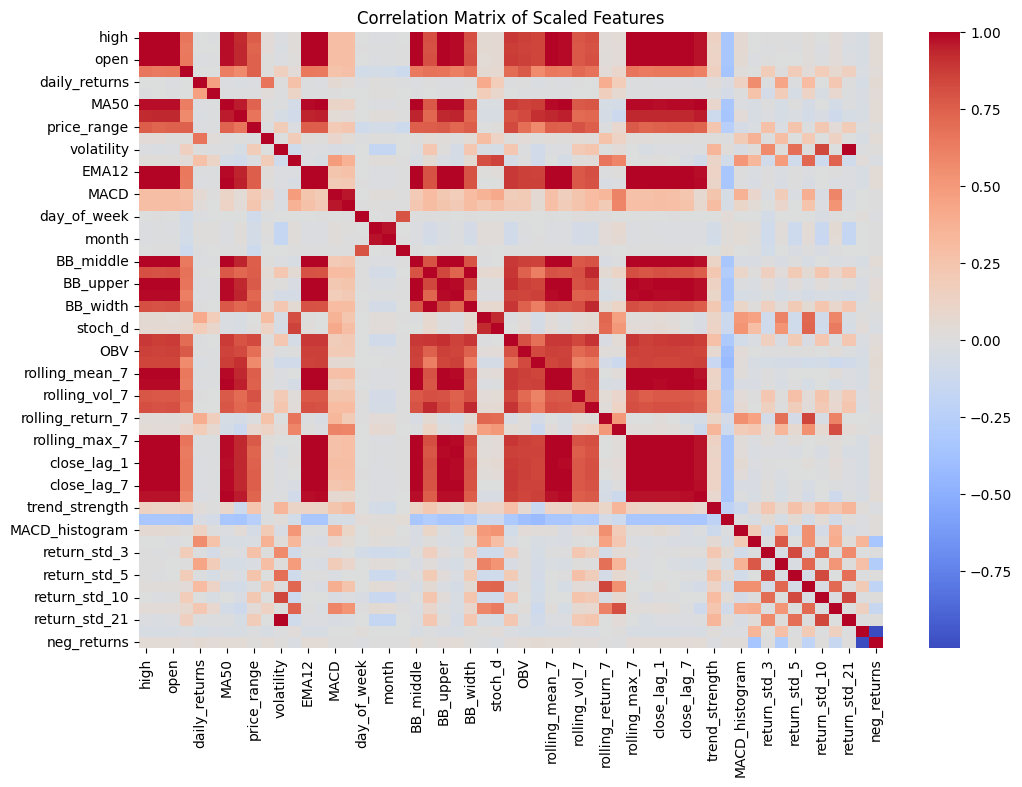

In [114]:
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(X_scaled.corr(), annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Scaled Features')
plt.show()

In [ ]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Initialize models
# rf_rmodel = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
# rf_pmodel = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
# gb_rmodel = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
# gb_pmodel = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# # Fit models
# rf_rmodel.fit(X_train, y_returns_train)
# rf_pmodel.fit(X_train, y_price_train)
# gb_rmodel.fit(X_train, y_returns_train)
# gb_pmodel.fit(X_train, y_price_train)


# # Make predictions
# predictions = {
#     'RF Returns': rf_rmodel.predict(X_test),
#     'RF Price': rf_pmodel.predict(X_test),
#     'GB Returns': gb_rmodel.predict(X_test),
#     'GB Price': gb_pmodel.predict(X_test)
# }



In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns

# Define parameter grids
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10]
}

# Initialize base models
rf_base = RandomForestRegressor(random_state=42)
gb_base = GradientBoostingRegressor(random_state=42)

# Create GridSearchCV objects
rf_price_cv = GridSearchCV(rf_base, rf_param_grid, cv=5, scoring='r2', n_jobs=-1)
rf_returns_cv = GridSearchCV(rf_base, rf_param_grid, cv=5, scoring='r2', n_jobs=-1)
gb_price_cv = GridSearchCV(gb_base, gb_param_grid, cv=5, scoring='r2', n_jobs=-1)
gb_returns_cv = GridSearchCV(gb_base, gb_param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit models with grid search
print("Tuning Random Forest Price Model...")
rf_price_cv.fit(X_train, y_price_train)
print("Tuning Random Forest Returns Model...")
rf_returns_cv.fit(X_train, y_returns_train)
print("Tuning Gradient Boosting Price Model...")
gb_price_cv.fit(X_train, y_price_train)
print("Tuning Gradient Boosting Returns Model...")
gb_returns_cv.fit(X_train, y_returns_train)

# Get best models
rf_pmodel = rf_price_cv.best_estimator_
rf_rmodel = rf_returns_cv.best_estimator_
gb_pmodel = gb_price_cv.best_estimator_
gb_rmodel = gb_returns_cv.best_estimator_


# Print best parameters
print("\nBest Parameters:")
print("RF Price:", rf_price_cv.best_params_)
print("RF Returns:", rf_returns_cv.best_params_)
print("GB Price:", gb_price_cv.best_params_)
print("GB Returns:", gb_returns_cv.best_params_)


Tuning Random Forest Price Model...
Tuning Random Forest Returns Model...
Tuning Gradient Boosting Price Model...
Tuning Gradient Boosting Returns Model...

Best Parameters:
RF Price: {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
RF Returns: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
GB Price: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}
GB Returns: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}


In [116]:
# Fit models
rf_rmodel.fit(X_train, y_returns_train)
rf_pmodel.fit(X_train, y_price_train)
gb_rmodel.fit(X_train, y_returns_train)
gb_pmodel.fit(X_train, y_price_train)


# Make predictions
predictions = {
    'RF Returns': rf_rmodel.predict(X_test),
    'RF Price': rf_pmodel.predict(X_test),
    'GB Returns': gb_rmodel.predict(X_test),
    'GB Price': gb_pmodel.predict(X_test)
}

In [119]:
# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    metrics = {
        'R2': r2_score(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAPE': mean_absolute_percentage_error(y_true, y_pred)
    }
    print(f"\n{model_name} Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    return metrics

# Calculate metrics
returns_metrics = {
    'RF': evaluate_model(y_returns_test, predictions['RF Returns'], 'Random Forest Returns'),
    'GB': evaluate_model(y_returns_test, predictions['GB Returns'], 'Gradient Boosting Returns')
}

price_metrics = {
    'RF': evaluate_model(y_price_test, predictions['RF Price'], 'Random Forest Price'),
    'GB': evaluate_model(y_price_test, predictions['GB Price'], 'Gradient Boosting Price')
}



Random Forest Returns Metrics:
R2: 0.8140
RMSE: 0.0109
MAPE: 8.4118

Gradient Boosting Returns Metrics:
R2: 0.7778
RMSE: 0.0119
MAPE: 6.7356

Random Forest Price Metrics:
R2: 0.9369
RMSE: 4908.4030
MAPE: 0.0350

Gradient Boosting Price Metrics:
R2: 0.9374
RMSE: 4886.4381
MAPE: 0.0349


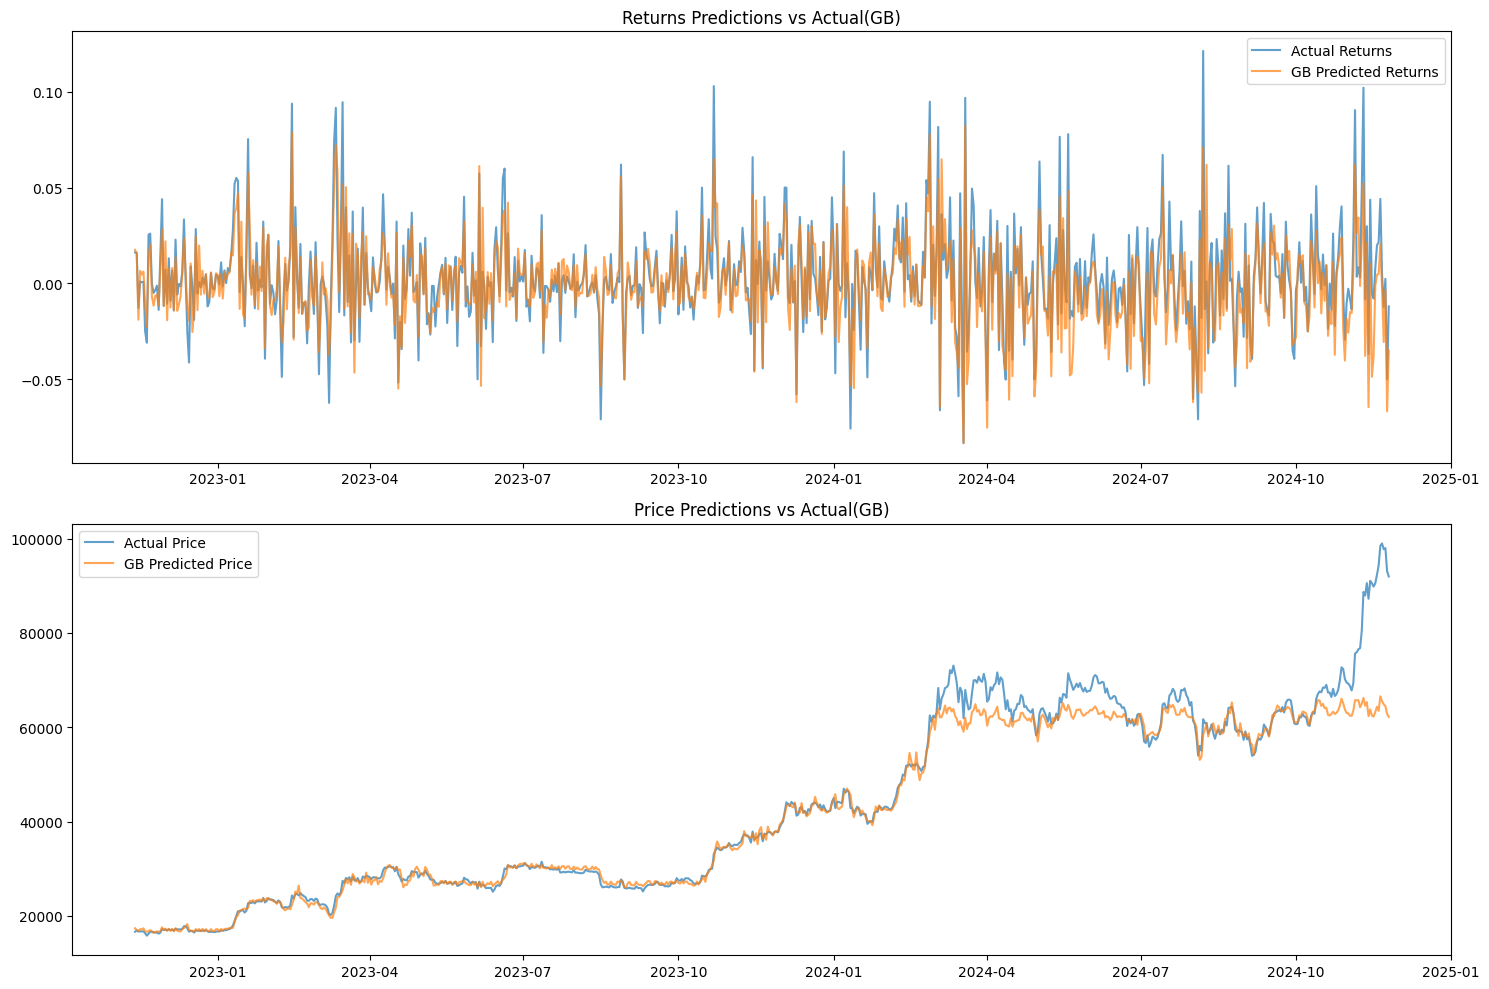

In [120]:
# Visualize predictions
plt.figure(figsize=(15, 10))

# Returns predictions
plt.subplot(2, 1, 1)
plt.plot(y_returns_test.index, y_returns_test, label='Actual Returns', alpha=0.7)
# plt.plot(y_returns_test.index, predictions['RF Returns'], label='RF Predicted Returns', alpha=0.7)
plt.plot(y_returns_test.index, predictions['GB Returns'], label='GB Predicted Returns', alpha=0.7)
plt.title('Returns Predictions vs Actual(GB)')
plt.legend()

# Price predictions
plt.subplot(2, 1, 2)
plt.plot(y_price_test.index, y_price_test, label='Actual Price', alpha=0.7)
# plt.plot(y_price_test.index, predictions['RF Price'], label='RF Predicted Price', alpha=0.7)
plt.plot(y_price_test.index, predictions['GB Price'], label='GB Predicted Price', alpha=0.7)
plt.title('Price Predictions vs Actual(GB)')
plt.legend()

plt.tight_layout()
plt.show()



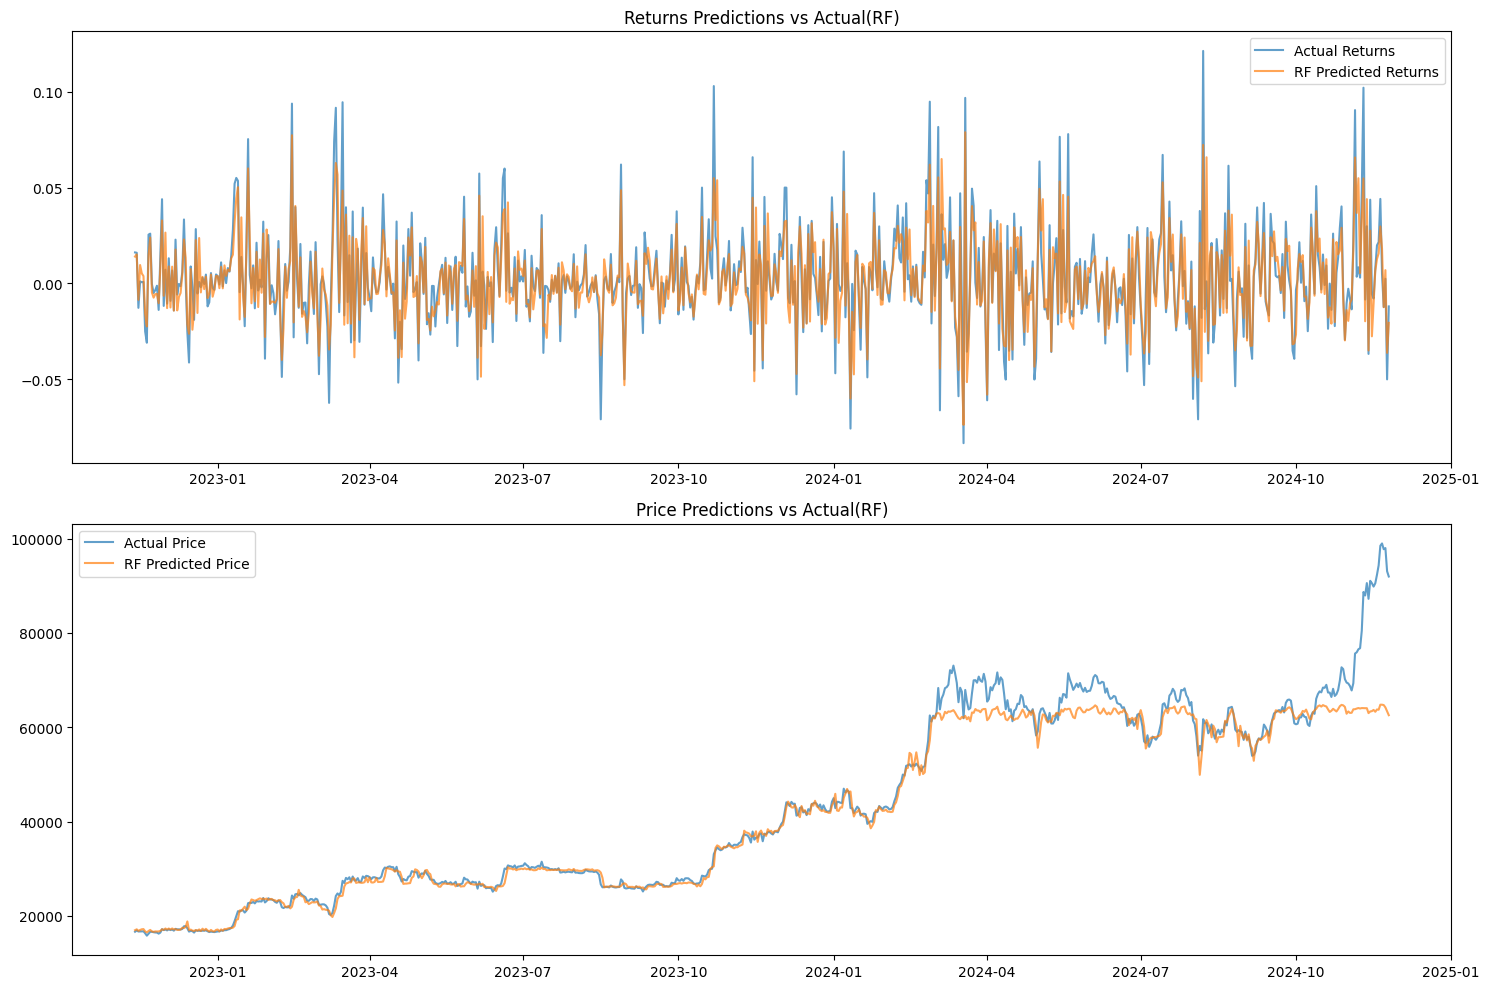

In [121]:
# Visualize predictions
plt.figure(figsize=(15, 10))

# Returns predictions
plt.subplot(2, 1, 1)
plt.plot(y_returns_test.index, y_returns_test, label='Actual Returns', alpha=0.7)
plt.plot(y_returns_test.index, predictions['RF Returns'], label='RF Predicted Returns', alpha=0.7)
# plt.plot(y_returns_test.index, predictions['GB Returns'], label='GB Predicted Returns', alpha=0.7)
plt.title('Returns Predictions vs Actual(RF)')
plt.legend()

# Price predictions
plt.subplot(2, 1, 2)
plt.plot(y_price_test.index, y_price_test, label='Actual Price', alpha=0.7)
plt.plot(y_price_test.index, predictions['RF Price'], label='RF Predicted Price', alpha=0.7)
# plt.plot(y_price_test.index, predictions['GB Price'], label='GB Predicted Price', alpha=0.7)
plt.title('Price Predictions vs Actual(RF)')
plt.legend()

plt.tight_layout()
plt.show()



In [122]:
# Feature importance (for Random Forest models)
def plot_feature_importance(model, feature_names, title):
    importance = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=True)
    
    plt.figure(figsize=(10, 6))
    plt.barh(importance['feature'], importance['importance'])
    plt.title(title)
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()


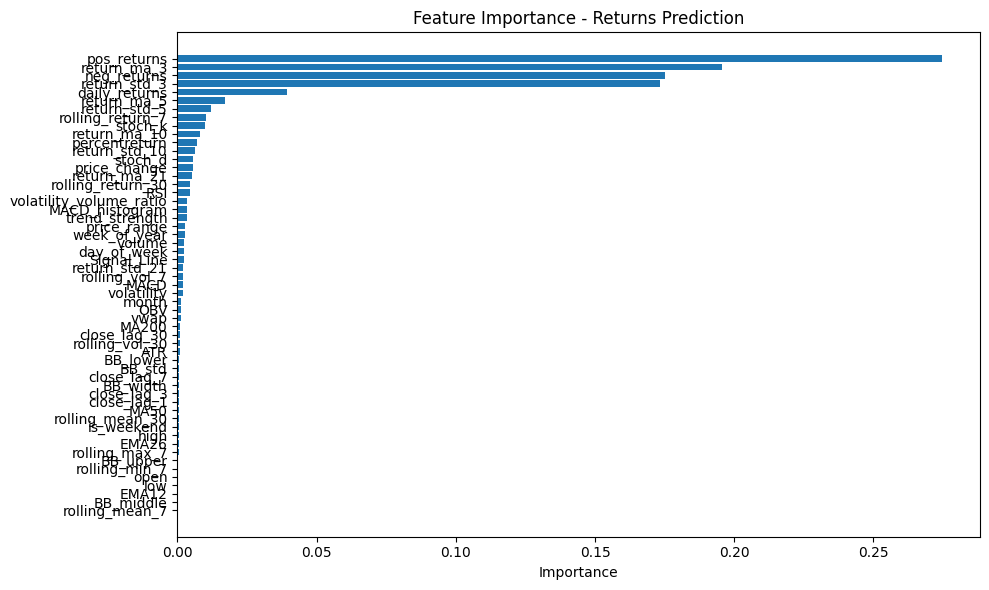

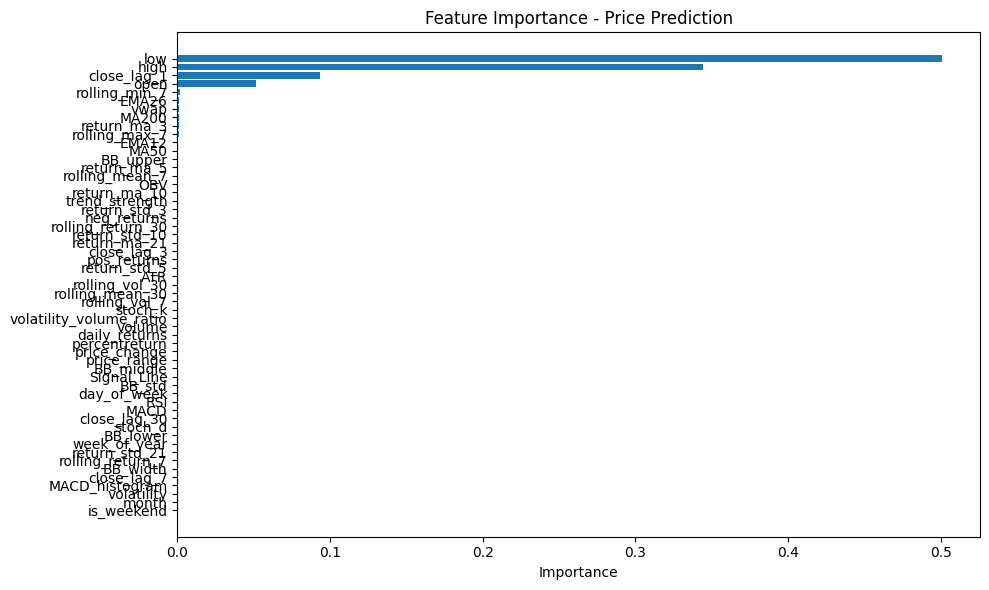

In [146]:
# Feature importance for Random Forest models
plot_feature_importance(rf_rmodel, X_train.columns, 'Feature Importance - Returns Prediction')
plot_feature_importance(rf_pmodel, X_train.columns, 'Feature Importance - Price Prediction')

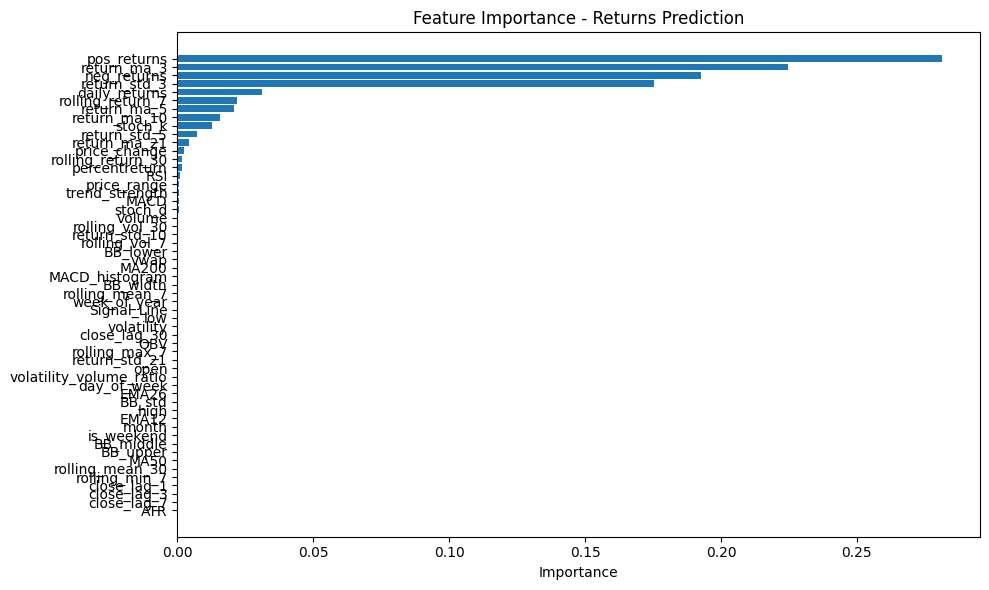

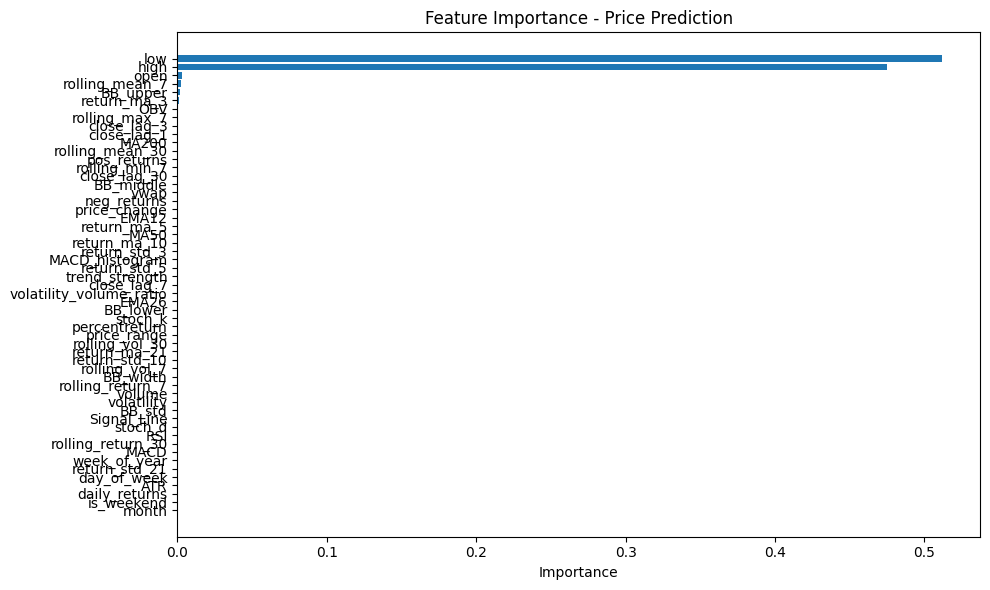

In [147]:
# Feature importance (for Gradient Boosting models)
plot_feature_importance(gb_rmodel, X_train.columns, 'Feature Importance - Returns Prediction')
plot_feature_importance(gb_pmodel, X_train.columns, 'Feature Importance - Price Prediction')


##### SAVE MODEL

In [148]:
from joblib import dump

# Save the models
dump(gb_pmodel, 'GBpricemodel.joblib')
dump(gb_rmodel, 'GBretturnsmodel.joblib')
dump(rf_pmodel, 'RFpricemodel.joblib')
dump(rf_rmodel, 'RFreturnsmodel.joblib')

['RFreturnsmodel.joblib']

In [149]:
import pickle

# Save the models
with open('GBpricemodel.pkl', 'wb') as file:
    pickle.dump(gb_pmodel, file)
with open('GBreturns.pkl', 'wb') as file:
    pickle.dump(gb_rmodel, file)
with open('RFpricemodel.pkl', 'wb') as file:
    pickle.dump(rf_pmodel, file)
with open('RFreturns.pkl', 'wb') as file:
    pickle.dump(rf_rmodel, file)

# END